# VO7 Schödinger GL, Numerov

In [1]:
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## 1D Schödinger Equation: Square Well

https://www.maths.tcd.ie/~dbennett/js/schro.pdf

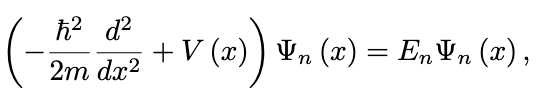

### Get wave function

In [2]:
def get_g(trail_e, fixed_v, gamma_squared):
    diff = gamma_squared*(trail_e - fixed_v)
    return [diff, diff, diff]

def numerov(y, g, delta_x):
    first_numer = 2.0*y[-1]*(1.0-(5.0/12.0)*delta_x**2*g[-2])
    second_numer = y[-2]*(1.0+(1.0/12.0)*delta_x**2*g[-3])
    denominator = 1.0 + (1.0/12.0)*delta_x**2*g[-1]
    return (first_numer - second_numer)/denominator

def get_psi_simple(length, g):
    psi = [0, 1e-4]
    for i in range(2, length):
        psi_new = numerov(psi, g[:3+i], delta_r)
        g_new = g[-1]
        psi.append(psi_new)
        g.append(g_new)
    return psi

delta_r: 0.001001


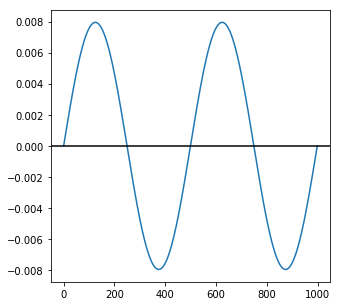

In [3]:
length = 1000
delta_r = 1/(length-1)
print("delta_r: %f" % delta_r)

g = get_g(-0.21043164791, -1, 200)
psi = get_psi_simple(length, g)

plt.figure(figsize=(5,5))
plt.plot(psi)
plt.axhline(0, c='black')
plt.show()
plt.close()

### Get the 10 first eigen energies

delta_r: 0.001001
eigenenergy_1:	-0.9506519780
eigenenergy_2:	-0.8026079120
eigenenergy_3:	-0.5558678020
eigenenergy_4:	-0.2104316480
eigenenergy_5:	0.2337005498
eigenenergy_6:	0.7765287913
eigenenergy_7:	1.4180530759
eigenenergy_8:	2.1582734031
eigenenergy_9:	2.9971897718
eigenenergy_10:	3.9348021804
Eigenenergies exact to min. 6th digit


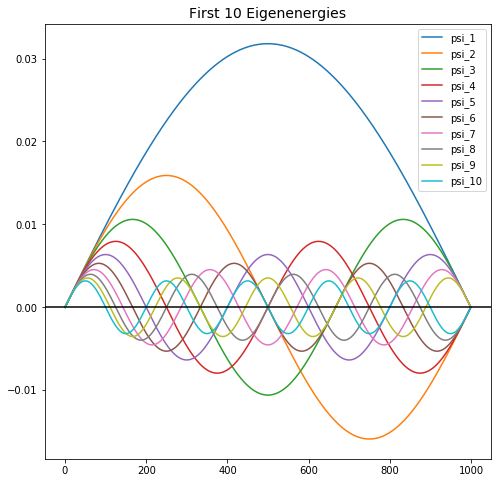

In [4]:
length = 1000
delta_r = 1.0/(length-1.0)
print("delta_r: %f" % delta_r)

delta_e = 0.01
trail_e = -0.99

all_psi = np.array([])
for i in range(10):
    # first run
    g = get_g(trail_e, -1, 200.0)
    psi = get_psi_simple(length, g)
    last_psi = psi[-1]

    while(abs(delta_e) > 1e-12):
        trail_e += delta_e
        g = get_g(trail_e, -1.0, 200.0)
        psi = get_psi_simple(length, g)

        if(last_psi*psi[-1] < 0):
            delta_e = -delta_e/2.0

        last_psi = psi[-1]

    print("eigenenergy_%i:\t%0.10f" % (i+1, trail_e))
    delta_e = 0.1 
    trail_e += delta_e
    
    if(len(all_psi) == 0):
        all_psi = psi
    else:
        all_psi = np.vstack([all_psi, psi])

print("Eigenenergies exact to min. 6th digit")
# plot
plt.figure(figsize=(8,8))
plt.title("First 10 Eigenenergies", fontsize=14)
for i in range(len(all_psi)):
    plt.plot(all_psi[i], label="psi_%i" % (i+1))
plt.legend()
plt.axhline(0, c='black')
plt.show()
plt.close()

## SG Lösen mit Einschrittverfahren

In [5]:
def show_arr(arr, title, x=None):
    plt.title(title)
    if(x != None):
        plt.plot(x, arr)
    else:
        plt.plot(arr)
    plt.show()
    plt.close()
    return None

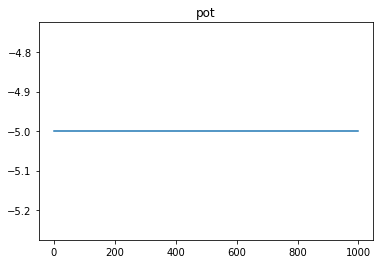

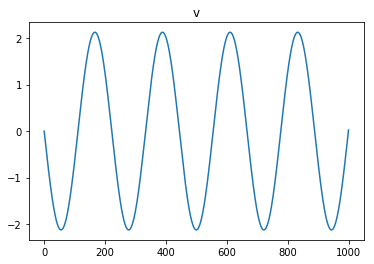

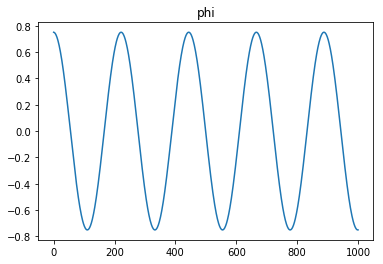

In [37]:
length = 1000

# phi = [1]
phi = [(1/np.pi)**(1/4)]
v = [-10e-4]
pot = np.array([-5 for item in range(length)])
e = -1
delta_x = 0.01

for i in range(length):
    v.append(v[-1] + delta_x*2*(pot[i]-e)*phi[-1])
    phi.append(phi[-1] + delta_x*v[-1])

show_arr(pot, "pot")
show_arr(v, "v")
show_arr(phi, "phi")

### Check if we get the same result as with Numerov

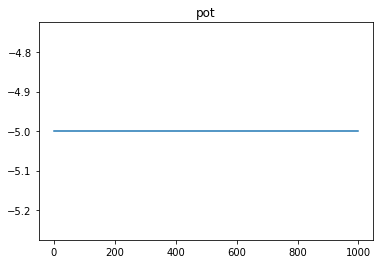

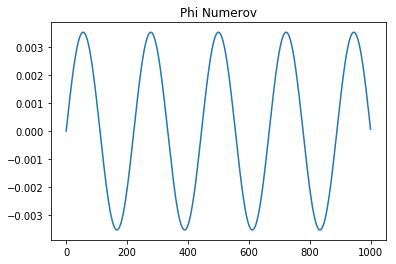

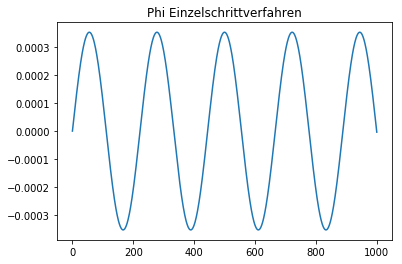

In [7]:
def get_psi_simple_g_array(length, g, delta_x):
    psi = [0, 1e-4]
    for i in range(2, length):
        psi_new = numerov(psi, g[:i+1], delta_x)
        psi.append(psi_new)
    return psi

length = 1000

pot = np.array([-5 for item in range(length)])
e = -1
g = -2*(pot-e) # -g(x) = 2*(V(x)-epsilon)
delta_x = 0.01

phi_num = get_psi_simple_g_array(length, g, delta_x)

show_arr(pot, "pot")
show_arr(phi_num, "Phi Numerov")
show_arr(phi, "Phi Einzelschrittverfahren")

## Tests

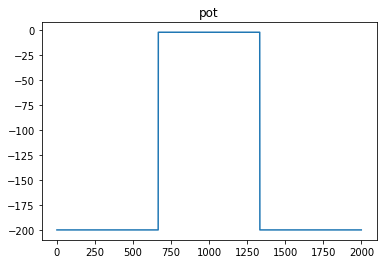

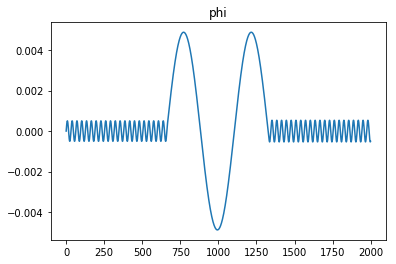

In [39]:
def get_psi_simple_g_array(length, g, delta_x):
    psi = [0, 1e-4]
    for i in range(2, length):
        psi_new = numerov(psi, g[:i+1], delta_x)
        psi.append(psi_new)
    return psi

length = 2000

pot = np.array([-200 for item in range(length)])
pot[int(length/3):int(length-length/3)] = -2

e = -1
g = -2*(pot-e) # -g(x) = 2*(V(x)-epsilon)
delta_x = 0.01

phi = get_psi_simple_g_array(length, g, delta_x)

show_arr(pot, "pot")
show_arr(phi, "phi")

/Users/christoph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


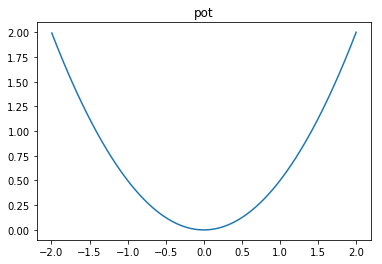

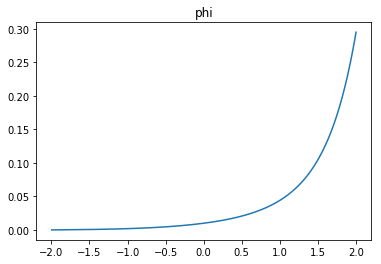

In [8]:
length = 1000
delta_x = -0.004

x = (np.arange(length)-length/2)*delta_x
# x = (np.arange(length))*delta_x
phi = [0]
v = [-10e-4]
pot = x**2/2
e = -1

for i in range(length-1):
    v.append(v[-1] + delta_x*2*(pot[i]-e)*phi[-1])
    phi.append(phi[-1] + delta_x*v[-1])

if(delta_x < 0):
    x_fliped = np.flip(x, axis=0)

show_arr(pot, "pot", x)
# show_arr(v, "v", x)
show_arr(phi, "phi", x_fliped)

/Users/christoph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


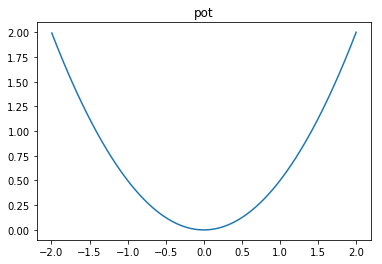

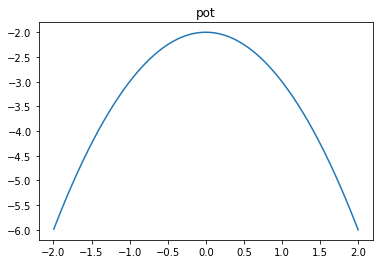

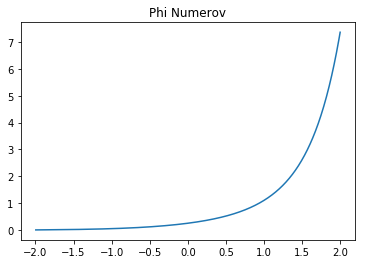

In [9]:
def get_psi_simple_g_array(length, g, delta_x):
    psi = [0, 1e-4]
    for i in range(2, length):
        psi_new = numerov(psi, g[:i+1], delta_x)
        psi.append(psi_new)
    return psi


length = 1000
delta_x = -0.004

x = (np.arange(length)-length/2)*delta_x
# x = (np.arange(length))*delta_x
phi = [0]
pot = x**2/2
e = -1
g = -2*(pot-e) # -g(x) = 2*(V(x)-epsilon)

phi_num = get_psi_simple_g_array(length, g, delta_x)

if(delta_x < 0):
    x_fliped = np.flip(x, axis=0)

show_arr(pot, "pot", x)
show_arr(g, "pot", x)
show_arr(phi_num, "Phi Numerov", x_fliped)
# show_arr(phi, "Phi Einzelschrittverfahren")

## UE8 Helium

In [10]:
def run_numerov(length, init_y, g, delta_x):
    y = init_y
    for i in range(2, length):
        y_new = numerov(y, g[:3+i], delta_x)
        y.append(y_new)
    return y

# def get_psi(length, init_psi, g):
#     psi = init_psi
#     for i in range(2, length):
#         psi_new = numerov(psi, g[:3+i], delta_r)
#         psi.append(psi_new)
#     return psi
# # psi = get_psi(length, init_psi, g)

# def get_g(length, init_g, psi):
#     g = init_g
#     for i in range(2, length):
#         psi_new = numerov(psi, g[:3+i], delta_r)
#         psi.append(psi_new)
#     return psi

In [11]:
length = 1000
delta_r = 1/(length-1)
print("delta_r: %f" % delta_r)

trail_e = -0.21043164791

# initial g for numerov with psi
g_psi = []
for i in range(1, length+1):
    g_psi.append(2*(trail_e + 2/(i*delta_r)))

# init psi
init_psi = [0, 1e-4]
# first psi
psi = run_numerov(length, init_psi, g_psi, delta_r)
print("psi[-1]: %f" % psi[-1])

# init phi
phi = [0, 1e-4]

for j in range(3):
    # first & next g for numerov with psi
    # g_phi = []
    # for i in range(length):
    #     g_phi.append(-4.0*np.pi*psi[i]**2)
    g_phi = -4.0*np.pi*np.array(psi)**2

    # first & next phi
    phi = run_numerov(length, phi[:2], g_phi, delta_r)

    # next g psi
    g_psi = []
    for i in range(1, length+1):
        g_psi.append(2*(trail_e + 2/(i*delta_r) + phi[i-1]))

    # next psi
    psi = run_numerov(length, psi[:2], g_psi, delta_r)
    print("psi[-1]: %f" % psi[-1])
#     print("len(psi): %i, len(phi): %i" % (len(psi), len(phi)))

#     if(j == 0):
#         phi_0 = phi
#     if(j == 1):
#         phi_1 = phi

    plt.figure(figsize=(5,5))
    plt.plot(psi, label="psi")
    plt.plot(phi, label="phi")
    plt.legend()
    plt.axhline(0, c='black')
#     plt.show()
    plt.close()

delta_r: 0.001001
psi[-1]: -0.001426
psi[-1]: -0.001725
psi[-1]: -0.001725
psi[-1]: -0.001725


-0.00172509525741


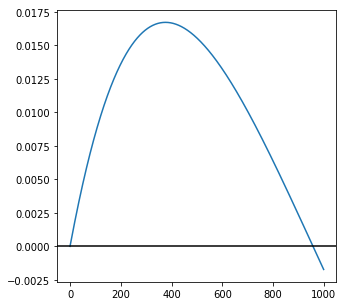

In [12]:
print(psi[-1])

plt.figure(figsize=(5,5))
plt.plot(psi)
plt.axhline(0, c='black')
plt.show()
plt.close()